In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
# first def f(x) funtcion of logistic befor compute cost or gradient
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [39]:
z_tmp = np.arange(-10,11)

y = sigmoid(z_tmp)

np.set_printoptions(precision=3)
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y]) # concate between input and output

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


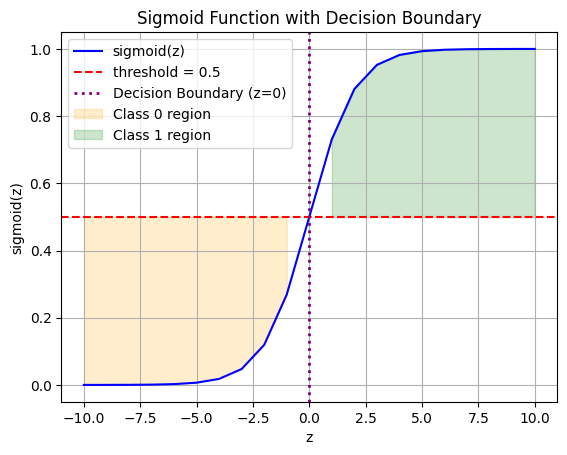

In [40]:
plt.plot(z_tmp, y, label="sigmoid(z)", color="blue")

plt.axhline(0.5, color='red', linestyle="--", label="threshold = 0.5")

plt.axvline(0, color='purple', linestyle=":", linewidth=2, label="Decision Boundary (z=0)")

plt.fill_between(z_tmp, y, 0.5, where=(z_tmp < 0), color='orange', alpha=0.2, label="Class 0 region")
plt.fill_between(z_tmp, y, 0.5, where=(z_tmp > 0), color='green', alpha=0.2, label="Class 1 region")

plt.title("Sigmoid Function with Decision Boundary")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.legend()
plt.grid(True)
plt.show()
#decision boundry = prop of condition equal 1/2

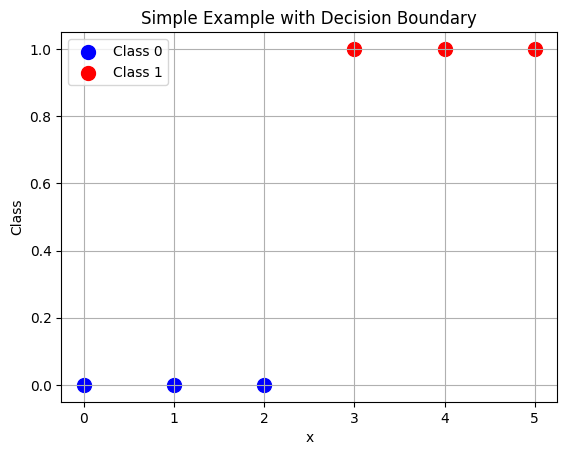

In [41]:
# second cost function
# we will not use MSE because not convex can not find min
# we use log

x_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.longdouble)
y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.longdouble)

plt.scatter(x_train[y_train == 0], y_train[y_train == 0], color='blue', label='Class 0', s=100)
plt.scatter(x_train[y_train == 1], y_train[y_train == 1], color='red', label='Class 1', s=100)


plt.xlabel("x")
plt.ylabel("Class")
plt.title("Simple Example with Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

In [42]:
def mse_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        z = np.dot(x[i], w) + b
        f_wb = sigmoid(z)
        cost += (f_wb - y[i]) ** 2
    return cost / m

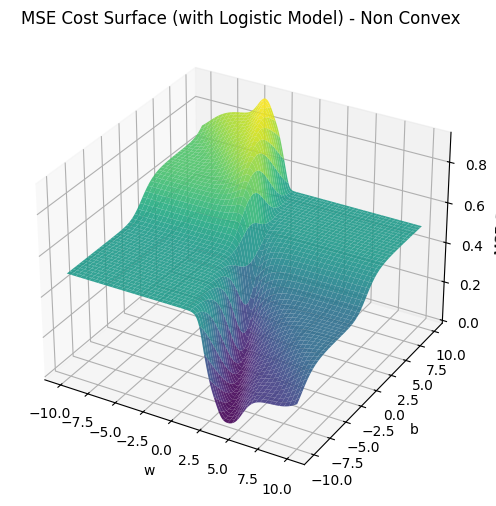

In [43]:
w_vals = np.linspace(-10, 10, 200)
b_vals = np.linspace(-10, 10, 200)
W, B = np.meshgrid(w_vals, b_vals)

Z = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i, j] = mse_cost(x_train, y_train, W[i, j], B[i, j])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, Z, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_title("MSE Cost Surface (with Logistic Model) - Non Convex")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("MSE Cost")

plt.show()

In [44]:
def logistic_cost(x,y,w,b):
  m=x.shape[0]
  cost=0
  for i in range(m):
    z=np.dot(x[i],w)+b
    f_wb=sigmoid(z)
    cost+=-y[i]*np.log(f_wb)-(1-y[i])*np.log(1-f_wb)
  return cost/m
  # second compute cost

/tmp/ipython-input-2684024846.py:7: RuntimeWarning: divide by zero encountered in log
  cost+=-y[i]*np.log(f_wb)-(1-y[i])*np.log(1-f_wb)
/tmp/ipython-input-2684024846.py:7: RuntimeWarning: invalid value encountered in scalar multiply
  cost+=-y[i]*np.log(f_wb)-(1-y[i])*np.log(1-f_wb)


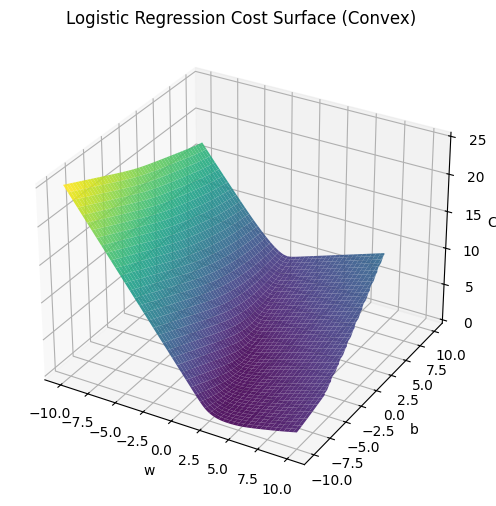

In [45]:
w_vals = np.linspace(-10, 10, 200)
b_vals = np.linspace(-10, 10, 200)
W, B = np.meshgrid(w_vals, b_vals)

Z = np.zeros_like(W, dtype=np.longdouble)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i, j] = logistic_cost(x_train, y_train, W[i, j], B[i, j])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, Z, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_title("Logistic Regression Cost Surface (Convex)")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("Cost")

plt.show()

In [46]:
def compute_gradient_logistic(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_db, dj_dw
    #third compute gradient

In [47]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):

        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:
            J_history.append(logistic_cost(X, y, w, b) )

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history
    #fourth compute gradient descent

# using sklearn

In [48]:
x = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

In [49]:
model=LogisticRegression()

In [50]:
model.fit(x,y)

LogisticRegression()

In [51]:
y_pred=model.predict(x)

In [52]:
model.score(x,y)

1.0